# DataFrame:
`Combination of more than one series is DataFrame `

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file

titanic = pd.read_csv('Course_Materials_Part1\\Course_Materials_Part1\\Video_Lecture_NBs\\titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [3]:
#  data head(), shape, size, columns

titanic.head(2), titanic.shape, titanic.size, titanic.columns

(   survived  pclass     sex   age  sibsp  parch     fare embarked deck
 0         0       3    male  22.0      1      0   7.2500        S  NaN
 1         1       1  female  38.0      1      0  71.2833        C    C,
 (891, 9),
 8019,
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embarked', 'deck'],
       dtype='object'))

### filtering data with different conditions

In [4]:
# Filter male from sex column in titanic data

print(titanic[titanic['sex'] == 'male'],'\n','\n', len(titanic[titanic['sex'] == 'male']),'\n','\n',
      titanic[titanic['sex'] == 'male'].count(),'\n','\n', (titanic['sex'] == 'male').value_counts(),'\n','\n',
     titanic[titanic['sex'] == 'male']['sex'].value_counts())

     survived  pclass   sex   age  sibsp  parch     fare embarked deck
0           0       3  male  22.0      1      0   7.2500        S  NaN
4           0       3  male  35.0      0      0   8.0500        S  NaN
5           0       3  male   NaN      0      0   8.4583        Q  NaN
6           0       1  male  54.0      0      0  51.8625        S    E
7           0       3  male   2.0      3      1  21.0750        S  NaN
..        ...     ...   ...   ...    ...    ...      ...      ...  ...
883         0       2  male  28.0      0      0  10.5000        S  NaN
884         0       3  male  25.0      0      0   7.0500        S  NaN
886         0       2  male  27.0      0      0  13.0000        S  NaN
889         1       1  male  26.0      0      0  30.0000        C    C
890         0       3  male  32.0      0      0   7.7500        Q  NaN

[577 rows x 9 columns] 
 
 577 
 
 survived    577
pclass      577
sex         577
age         453
sibsp       577
parch       577
fare        577


In [5]:
# Filter male from sex column in titanic data and take out total fare of male

male_fare = titanic[titanic['sex'] == 'male']['fare']

male_fare.sum()

14727.286500000002

In [6]:
# descriptive statistics for male fare

male_fare = titanic[titanic['sex'] == 'male']['fare'].describe()

male_fare

count    577.000000
mean      25.523893
std       43.138263
min        0.000000
25%        7.895800
50%       10.500000
75%       26.550000
max      512.329200
Name: fare, dtype: float64

In [7]:
# descriptive statistics for female fare

female_fare = titanic[titanic['sex'] == 'female']['fare'].describe()

female_fare

count    314.000000
mean      44.479818
std       57.997698
min        6.750000
25%       12.071875
50%       23.000000
75%       55.000000
max      512.329200
Name: fare, dtype: float64

In [8]:
# Create dataframe for male and female descriptive stats of fare 

fare = pd.DataFrame({'male_stats' : male_fare, 'female_stats' : female_fare })
fare

,male_stats,female_stats
count,577.000000,314.000000
mean,25.523893,44.479818
std,43.138263,57.997698
min,0.000000,6.750000
25%,7.895800,12.071875
50%,10.500000,23.000000
75%,26.550000,55.000000
max,512.329200,512.329200


In [9]:
# Comparision of male_stats and female_stats

fare['comparision'] = male_fare-female_fare
fare

,male_stats,female_stats,comparision
count,577.000000,314.000000,263.000000
mean,25.523893,44.479818,-18.955924
std,43.138263,57.997698,-14.859435
min,0.000000,6.750000,-6.750000
25%,7.895800,12.071875,-4.176075
50%,10.500000,23.000000,-12.500000
75%,26.550000,55.000000,-28.450000
max,512.329200,512.329200,0.000000


In [10]:
# dtype of dataframe

titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
deck         object
dtype: object

In [11]:
# Filter the object columns

filter1 = titanic.dtypes == object
filter1

survived    False
pclass      False
sex          True
age         False
sibsp       False
parch       False
fare        False
embarked     True
deck         True
dtype: bool

In [12]:
# Filter object columns data

titanic.loc[:,filter1]

,sex,embarked,deck
0,male,S,NaN
1,female,C,C
2,female,S,NaN
3,female,S,C
4,male,S,NaN
...,...,...,...
886,male,S,NaN
887,female,S,B
888,female,S,NaN
889,male,C,C


In [13]:
# Filter except(~(not)) the object columns data

titanic.loc[:,~filter1]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [14]:
# Filter the female from the sex column

filter2 = titanic['sex'] == 'female'
filter2

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: sex, Length: 891, dtype: bool

In [15]:
# Filter the male from the sex column

filter3 = titanic['sex'] == 'male'
filter3

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [16]:
# Filter data for female only object columns

titanic.loc[filter2,filter1]

,sex,embarked,deck
1,female,C,C
2,female,S,NaN
3,female,S,C
8,female,S,NaN
9,female,C,NaN
...,...,...,...
880,female,S,NaN
882,female,S,NaN
885,female,Q,NaN
887,female,S,B


In [17]:
# Filter data for male columns except the objects

titanic.loc[filter3,~filter1]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
...,...,...,...,...,...,...
883,0,2,28.0,0,0,10.5000
884,0,3,25.0,0,0,7.0500
886,0,2,27.0,0,0,13.0000
889,1,1,26.0,0,0,30.0000


In [18]:
# filter data for age greater than 18-50

fil_age = titanic[(titanic['age'] >= 18) & (titanic['age'] < 51)]
fil_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
889,1,1,male,26.0,0,0,30.0000,C,C


In [19]:
# Filter data for age greater than 50-60 or greater than 69

fil_age1 = titanic[((titanic['age'] >= 51) & (titanic['age'] < 61)) | (titanic['age'] >= 70)]
fil_age1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
6,0,1,male,54.0,0,0,51.8625,S,E
11,1,1,female,58.0,0,0,26.5500,S,C
15,1,2,female,55.0,0,0,16.0000,S,NaN
94,0,3,male,59.0,0,0,7.2500,S,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
124,0,1,male,54.0,0,1,77.2875,S,D
150,0,2,male,51.0,0,0,12.5250,S,NaN
152,0,3,male,55.5,0,0,8.0500,S,NaN
155,0,1,male,51.0,0,1,61.3792,C,NaN


In [20]:
# Filter data for age greater than 50-60 and greater than 69

fil_age1 = titanic[((titanic['age'] >= 51) & (titanic['age'] < 61)) & (titanic['age'] >= 70)]
fil_age1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck


In [21]:
# Filter male age with loc

titanic.loc[titanic['sex'] == 'male','age']

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [22]:
# Checking two conditions with .equals()

titanic[titanic['sex'] == 'male']['age'].equals(titanic.loc[titanic['sex'] == 'male','age'])

True

### Advance filtering with between, isin() and ~(not)

In [23]:
# Read csv file

summer = pd.read_csv('..\\summer.csv')
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [24]:
# Filter 1988 year data

s_1988 = summer[summer['Year'] == 1988]
s_1988

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
18051,1988,Seoul,Aquatics,Diving,"MENA CAMPOS, Jesus",MEX,Men,10M Platform,Bronze
18052,1988,Seoul,Aquatics,Diving,"LOUGANIS, Gregory",USA,Men,10M Platform,Gold
18053,1988,Seoul,Aquatics,Diving,"XIONG, Ni",CHN,Men,10M Platform,Silver
18054,1988,Seoul,Aquatics,Diving,"WYLAND-WILLIAMS, Wendy Lian",USA,Women,10M Platform,Bronze
18055,1988,Seoul,Aquatics,Diving,"XU, Yan-Mei",CHN,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
19592,1988,Seoul,Wrestling,Wrestling Gre-R,"KOMCHEV, Atanas Slavov",BUL,Men,82 - 90KG (Light-Heavyweight),Gold
19593,1988,Seoul,Wrestling,Wrestling Gre-R,"KOSKELA, Harri Matias",FIN,Men,82 - 90KG (Light-Heavyweight),Silver
19594,1988,Seoul,Wrestling,Wrestling Gre-R,"KOSLOWSKI, Dennis Marvin",USA,Men,90 - 100KG (Heavyweight),Bronze
19595,1988,Seoul,Wrestling,Wrestling Gre-R,"WRONSKI, Andrzej",POL,Men,90 - 100KG (Heavyweight),Gold


In [25]:
# Shape and info of the data s_1988

s_1988.shape,'\n',s_1988.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 18051 to 19596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1546 non-null   int64 
 1   City        1546 non-null   object
 2   Sport       1546 non-null   object
 3   Discipline  1546 non-null   object
 4   Athlete     1546 non-null   object
 5   Country     1546 non-null   object
 6   Gender      1546 non-null   object
 7   Event       1546 non-null   object
 8   Medal       1546 non-null   object
dtypes: int64(1), object(8)
memory usage: 120.8+ KB


((1546, 9), '\n', None)

#### between()

In [26]:
# filter between 1960-1969

summer['Year'].between(1960,1969)

0        False
1        False
2        False
3        False
4        False
         ...  
31160    False
31161    False
31162    False
31163    False
31164    False
Name: Year, Length: 31165, dtype: bool

In [27]:
# filter data not between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[summer['Year'].between(1960, 1969)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
9792,1960,Rome,Aquatics,Diving,"PHELPS, Brian Eric",GBR,Men,10M Platform,Bronze
9793,1960,Rome,Aquatics,Diving,"WEBSTER, Robert David",USA,Men,10M Platform,Gold
9794,1960,Rome,Aquatics,Diving,"TOBIAN, Gary Milburn",USA,Men,10M Platform,Silver
9795,1960,Rome,Aquatics,Diving,"KRUTOVA, Ninel",URS,Women,10M Platform,Bronze
9796,1960,Rome,Aquatics,Diving,"KRÄMER-ENGEL-GULBIN, Ingrid",EUA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
12710,1968,Mexico,Wrestling,Wrestling Gre-R,"METZ, Lothar",GDR,Men,78 - 87KG (Middleweight),Gold
12711,1968,Mexico,Wrestling,Wrestling Gre-R,"OLEINIK, Valentin",URS,Men,78 - 87KG (Middleweight),Silver
12712,1968,Mexico,Wrestling,Wrestling Gre-R,"MARTINESCU, Nicolae",ROU,Men,87 - 97KG (Light-Heavyweight),Bronze
12713,1968,Mexico,Wrestling,Wrestling Gre-R,"RADEV, Boyan Aleksandrov",BUL,Men,87 - 97KG (Light-Heavyweight),Gold


In [28]:
# filter data between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[summer['Year'].between(1960, 1969, inclusive= 'neither')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
10674,1964,Tokyo,Aquatics,Diving,"GOMPF, Thomas Eugen",USA,Men,10M Platform,Bronze
10675,1964,Tokyo,Aquatics,Diving,"WEBSTER, Robert David",USA,Men,10M Platform,Gold
10676,1964,Tokyo,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,Silver
10677,1964,Tokyo,Aquatics,Diving,"ALEKSEEVA, Galina",URS,Women,10M Platform,Bronze
10678,1964,Tokyo,Aquatics,Diving,"BUSH, Lesley Leigh",USA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
12710,1968,Mexico,Wrestling,Wrestling Gre-R,"METZ, Lothar",GDR,Men,78 - 87KG (Middleweight),Gold
12711,1968,Mexico,Wrestling,Wrestling Gre-R,"OLEINIK, Valentin",URS,Men,78 - 87KG (Middleweight),Silver
12712,1968,Mexico,Wrestling,Wrestling Gre-R,"MARTINESCU, Nicolae",ROU,Men,87 - 97KG (Light-Heavyweight),Bronze
12713,1968,Mexico,Wrestling,Wrestling Gre-R,"RADEV, Boyan Aleksandrov",BUL,Men,87 - 97KG (Light-Heavyweight),Gold


In [29]:
# filter data not between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[summer['Year'].between(1960, 1969, inclusive= 'left')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
9792,1960,Rome,Aquatics,Diving,"PHELPS, Brian Eric",GBR,Men,10M Platform,Bronze
9793,1960,Rome,Aquatics,Diving,"WEBSTER, Robert David",USA,Men,10M Platform,Gold
9794,1960,Rome,Aquatics,Diving,"TOBIAN, Gary Milburn",USA,Men,10M Platform,Silver
9795,1960,Rome,Aquatics,Diving,"KRUTOVA, Ninel",URS,Women,10M Platform,Bronze
9796,1960,Rome,Aquatics,Diving,"KRÄMER-ENGEL-GULBIN, Ingrid",EUA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
12710,1968,Mexico,Wrestling,Wrestling Gre-R,"METZ, Lothar",GDR,Men,78 - 87KG (Middleweight),Gold
12711,1968,Mexico,Wrestling,Wrestling Gre-R,"OLEINIK, Valentin",URS,Men,78 - 87KG (Middleweight),Silver
12712,1968,Mexico,Wrestling,Wrestling Gre-R,"MARTINESCU, Nicolae",ROU,Men,87 - 97KG (Light-Heavyweight),Bronze
12713,1968,Mexico,Wrestling,Wrestling Gre-R,"RADEV, Boyan Aleksandrov",BUL,Men,87 - 97KG (Light-Heavyweight),Gold


In [30]:
# filter data not between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[summer['Year'].between(1960, 1969, inclusive= 'right')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
10674,1964,Tokyo,Aquatics,Diving,"GOMPF, Thomas Eugen",USA,Men,10M Platform,Bronze
10675,1964,Tokyo,Aquatics,Diving,"WEBSTER, Robert David",USA,Men,10M Platform,Gold
10676,1964,Tokyo,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,Silver
10677,1964,Tokyo,Aquatics,Diving,"ALEKSEEVA, Galina",URS,Women,10M Platform,Bronze
10678,1964,Tokyo,Aquatics,Diving,"BUSH, Lesley Leigh",USA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
12710,1968,Mexico,Wrestling,Wrestling Gre-R,"METZ, Lothar",GDR,Men,78 - 87KG (Middleweight),Gold
12711,1968,Mexico,Wrestling,Wrestling Gre-R,"OLEINIK, Valentin",URS,Men,78 - 87KG (Middleweight),Silver
12712,1968,Mexico,Wrestling,Wrestling Gre-R,"MARTINESCU, Nicolae",ROU,Men,87 - 97KG (Light-Heavyweight),Bronze
12713,1968,Mexico,Wrestling,Wrestling Gre-R,"RADEV, Boyan Aleksandrov",BUL,Men,87 - 97KG (Light-Heavyweight),Gold


In [31]:
# filter data not between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[~summer['Year'].between(1960, 1969, inclusive= 'both')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [32]:
# filter data not between 1960-1969
# By default parameter inclusive= True (means it include the start and the end value)

summer[~summer['Year'].between(1960, 1969, inclusive= 'neither')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


#### isin()

In [33]:
# filter data using isin()

summer[summer['Year'].isin([1972,1996,1968])]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11684,1968,Mexico,Aquatics,Diving,"YOUNG, Edwin Frank",USA,Men,10M Platform,Bronze
11685,1968,Mexico,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,Gold
11686,1968,Mexico,Aquatics,Diving,"GAXIOLA ROBLES, Alvaro",MEX,Men,10M Platform,Silver
11687,1968,Mexico,Aquatics,Diving,"PETERSON, Ann Stewart",USA,Women,10M Platform,Bronze
11688,1968,Mexico,Aquatics,Diving,"DUCHKOVA, Milena",TCH,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
23156,1996,Atlanta,Wrestling,Wrestling Gre-R,"OLEYNYK, Vyacheslav",UKR,Men,82 - 90KG (Light-Heavyweight),Gold
23157,1996,Atlanta,Wrestling,Wrestling Gre-R,"FAFINSKI, Jacek",POL,Men,82 - 90KG (Light-Heavyweight),Silver
23158,1996,Atlanta,Wrestling,Wrestling Gre-R,"LJUNGBERG, Mikael",SWE,Men,90 - 100KG (Heavyweight),Bronze
23159,1996,Atlanta,Wrestling,Wrestling Gre-R,"WRONSKI, Andrzej",POL,Men,90 - 100KG (Heavyweight),Gold


In [34]:
# unique values of the filter data

summer[summer['Year'].isin([1972,1996,1968])]['Year'].unique()

array([1968, 1972, 1996], dtype=int64)

In [35]:
# filter data using isin()

summer[summer['Year'].isin([1996,1972,1964,1988])]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
10674,1964,Tokyo,Aquatics,Diving,"GOMPF, Thomas Eugen",USA,Men,10M Platform,Bronze
10675,1964,Tokyo,Aquatics,Diving,"WEBSTER, Robert David",USA,Men,10M Platform,Gold
10676,1964,Tokyo,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,Silver
10677,1964,Tokyo,Aquatics,Diving,"ALEKSEEVA, Galina",URS,Women,10M Platform,Bronze
10678,1964,Tokyo,Aquatics,Diving,"BUSH, Lesley Leigh",USA,Women,10M Platform,Gold
...,...,...,...,...,...,...,...,...,...
23156,1996,Atlanta,Wrestling,Wrestling Gre-R,"OLEYNYK, Vyacheslav",UKR,Men,82 - 90KG (Light-Heavyweight),Gold
23157,1996,Atlanta,Wrestling,Wrestling Gre-R,"FAFINSKI, Jacek",POL,Men,82 - 90KG (Light-Heavyweight),Silver
23158,1996,Atlanta,Wrestling,Wrestling Gre-R,"LJUNGBERG, Mikael",SWE,Men,90 - 100KG (Heavyweight),Bronze
23159,1996,Atlanta,Wrestling,Wrestling Gre-R,"WRONSKI, Andrzej",POL,Men,90 - 100KG (Heavyweight),Gold


In [36]:
# filter data using isin() which is except the passed info

summer[~summer['Year'].isin([1996,1972,1964,1988])]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### check data with any() and all()

In [37]:
# head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [38]:
# Check if any of the values is true

(titanic['sex'] == 'male').any()

True

In [39]:
# Check if all the values are true

(titanic['sex'] == 'male').all()

False

In [40]:
# Check if any of the values is true

(titanic['age'] >= 50).any()

True

In [41]:
# Check if all of the values is true

(titanic['age'] >= 50).all()

False

### Removing/Drop Columns

In [42]:
# head

summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [43]:
# Drop the column Gender

summer.drop(columns= 'Gender')

,Year,City,Sport,Discipline,Athlete,Country,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Wg 96 KG,Bronze


In [44]:
# Drop multiple columns

summer.drop(columns= ['City','Country'])

,Year,Sport,Discipline,Athlete,Gender,Event,Medal
0,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,1896,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
31160,2012,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,2012,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,2012,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver
31163,2012,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",Men,Wg 96 KG,Bronze


In [45]:
# drop multiple columns by parameters lable and axis

summer.drop(labels= ['City', 'Country'], axis= 'columns')

,Year,Sport,Discipline,Athlete,Gender,Event,Medal
0,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,1896,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...
31160,2012,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,2012,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,2012,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver
31163,2012,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",Men,Wg 96 KG,Bronze


In [46]:
# drop multiple columns by parameters lable and axis
# error due to labels not found in the index/0

summer.drop(labels= ['City', 'Country'], axis= 'index')

KeyError: "['City', 'Country'] not found in axis"

In [47]:
# Summer data copy

s1 = summer.copy()
s1

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [48]:
# drop multiple columns by inplace= True

s1.drop(columns= ['Year', 'City', 'Discipline'], inplace= True)
s1

,Sport,Athlete,Country,Gender,Event,Medal
0,Aquatics,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Aquatics,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Aquatics,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Aquatics,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Aquatics,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...
31160,Wrestling,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,Wrestling,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,Wrestling,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,Wrestling,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### Removing/ Drop Rows

In [49]:
# head

summer.head(n=3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [50]:
# Drop index - [2,4,5]

summer.drop(index= [2,4,5], inplace= True)

In [51]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [52]:
# Drop index = [1,0]

summer.drop(labels= [1,0])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [53]:
# set 'Athlete' column as an index, inplace= True

summer.set_index('Athlete',inplace= True)

In [55]:
summer

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"HAJOS, Alfred",1896,Athens,Aquatics,Swimming,HUN,Men,1200M Freestyle,Gold
"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


In [56]:
# Drop index = 'HAJOS, Alfred', inplace= True, axis= 0/'index'

summer.drop(index= 'HAJOS, Alfred', inplace= True, axis= 0)

In [57]:
# Drop index = 'HAJOS, Alfred'
# Error due to lable not in the data, as it is already deleted

summer.drop(labels= 'HAJOS, Alfred')

KeyError: "['HAJOS, Alfred'] not found in axis"

In [58]:
# drop lable= 'ANDREOU, Joannis'

summer.drop(labels= 'ANDREOU, Joannis')

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"CHOROPHAS, Efstathios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Bronze
"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
"PEPANOS, Antonios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver
...,...,...,...,...,...,...,...,...
"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver


### Adding Columns

In [59]:
# Head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [60]:
# add Column taste

titanic['taste'] = 'Taste'
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste
0,0,3,male,22.0,1,0,7.2500,S,NaN,Taste
1,1,1,female,38.0,1,0,71.2833,C,C,Taste
2,1,3,female,26.0,0,0,7.9250,S,NaN,Taste
3,1,1,female,35.0,1,0,53.1000,S,C,Taste
4,0,3,male,35.0,0,0,8.0500,S,NaN,Taste
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,Taste
887,1,1,female,19.0,0,0,30.0000,S,B,Taste
888,0,3,female,NaN,1,2,23.4500,S,NaN,Taste
889,1,1,male,26.0,0,0,30.0000,C,C,Taste


In [61]:
# Change value of the column

titanic['taste'] = 'test'
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste
0,0,3,male,22.0,1,0,7.2500,S,NaN,test
1,1,1,female,38.0,1,0,71.2833,C,C,test
2,1,3,female,26.0,0,0,7.9250,S,NaN,test
3,1,1,female,35.0,1,0,53.1000,S,C,test
4,0,3,male,35.0,0,0,8.0500,S,NaN,test
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,test
887,1,1,female,19.0,0,0,30.0000,S,B,test
888,0,3,female,NaN,1,2,23.4500,S,NaN,test
889,1,1,male,26.0,0,0,30.0000,C,C,test


In [62]:
# Change data for a particular index value of the column

# This is also the correct way to do -
# titanic['sex'][0] = 'transgender'
# titanic

titanic['sex'].iloc[0] = 'transgender'
titanic

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\821658092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'].iloc[0] = 'transgender'


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste
0,0,3,transgender,22.0,1,0,7.2500,S,NaN,test
1,1,1,female,38.0,1,0,71.2833,C,C,test
2,1,3,female,26.0,0,0,7.9250,S,NaN,test
3,1,1,female,35.0,1,0,53.1000,S,C,test
4,0,3,male,35.0,0,0,8.0500,S,NaN,test
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,test
887,1,1,female,19.0,0,0,30.0000,S,B,test
888,0,3,female,NaN,1,2,23.4500,S,NaN,test
889,1,1,male,26.0,0,0,30.0000,C,C,test


In [63]:
# Create a column name relative

titanic['relative'] = 'pclass'+'sibsp'
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
0,0,3,transgender,22.0,1,0,7.2500,S,NaN,test,pclasssibsp
1,1,1,female,38.0,1,0,71.2833,C,C,test,pclasssibsp
2,1,3,female,26.0,0,0,7.9250,S,NaN,test,pclasssibsp
3,1,1,female,35.0,1,0,53.1000,S,C,test,pclasssibsp
4,0,3,male,35.0,0,0,8.0500,S,NaN,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,test,pclasssibsp
887,1,1,female,19.0,0,0,30.0000,S,B,test,pclasssibsp
888,0,3,female,NaN,1,2,23.4500,S,NaN,test,pclasssibsp
889,1,1,male,26.0,0,0,30.0000,C,C,test,pclasssibsp


In [64]:
# create a data by adding the 'pclass' and 'sibsp' columns

ps_class = titanic['pclass']+titanic['sibsp']
ps_class.head()

0    4
1    2
2    3
3    2
4    3
dtype: int64

#### insert()

In [65]:
# insert a column at location index 0 by column name psclass with values stored in ps_class
# parameters loc=0 (means insert at index number), column= 'psclass' (means column name),
# value= ps_class (means the value for the column)

titanic.insert(loc=0, column= 'psclass', value= ps_class)
titanic.head()

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
0,4,0,3,transgender,22.0,1,0,7.2500,S,NaN,test,pclasssibsp
1,2,1,1,female,38.0,1,0,71.2833,C,C,test,pclasssibsp
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,test,pclasssibsp
3,2,1,1,female,35.0,1,0,53.1000,S,C,test,pclasssibsp
4,3,0,3,male,35.0,0,0,8.0500,S,NaN,test,pclasssibsp


### Adding Rows

In [66]:
# head

summer.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
"CHOROPHAS, Efstathios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Bronze
"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold


In [67]:
# Data columns

summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event',
       'Medal'],
      dtype='object')

In [68]:
# Reset index of data

summer.reset_index(inplace= True)
summer

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,"CHOROPHAS, Efstathios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Bronze
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31155,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
31156,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
31157,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver
31158,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze


In [69]:
# Change in row data at row index 3

summer.loc[3,:] = ['palak', 1993, 'Gurugram', 'Aquatics', 'Swimming', 'IND', 'Girl', '1200M Freestyle', 'Diamond']

In [70]:
summer

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31155,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
31156,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
31157,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver
31158,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze


#### append()

In [71]:
# Copy of a Data(summer)

s2 = summer.copy()
s2

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31155,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
31156,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
31157,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver
31158,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze


In [72]:
# Slicing of the data from row index 0-6 and all columns

s2 = s2.iloc[0:6,:]
s2

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
5,"PEPANOS, Antonios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver


In [73]:
# set index to 'Athlete'

s2.set_index('Athlete', inplace= True)
s2

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
"PEPANOS, Antonios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver


In [76]:
# create dataframe for appending
# nested list is passed for adding the data in a row
# columns= columns name and index= index name

s = [[1993, 'Gurugram', 'Aquatics', 'Swimming1', 'Germany','Girl', '1200M_Freestyle', 'Diamond']]
s = pd.DataFrame(s, columns= s2.columns, index= ['Palak'])
s

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Palak,1993,Gurugram,Aquatics,Swimming1,Germany,Girl,1200M_Freestyle,Diamond


In [77]:
# Append(add) the data(row)
# it appends in the last
# Parameter ignor_index= False means do not change the index 

s2 = s2.append(s, ignore_index= False)
s2

AttributeError: 'DataFrame' object has no attribute 'append'

In [222]:
# Append the data(row)
# it appends in the last
# Parameter ignor_index= True means change the index
# append is removed in future versions so use concat

s2 = s2.append(s, ignore_index= True)
s2

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_17648\3587317095.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2 = s2.append(s, ignore_index= True)


,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
4,1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
5,1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver
6,1993,Gurugram,Aquatics,Swimming1,Germany,Girl,1200M_Freestyle,Diamond
7,1993,Gurugram,Aquatics,Swimming1,Germany,Girl,1200M_Freestyle,Diamond


In [78]:
# checking data for 'Gurugram'

s2[s2['City'] == 'Gurugram']

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond


In [79]:
# Slicing of the data from row index 0-6 and all columns

s3 = summer.iloc[0:6,:]
s3.set_index('Athlete', inplace= True)
s3

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
"PEPANOS, Antonios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver


#### index.name

In [80]:
s3 

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
"PEPANOS, Antonios",1896,Athens,Aquatics,Swimming,GRE,Men,400M Freestyle,Silver


In [81]:
# create dataframe for appending
# nested list is passed for adding the data in a row
# columns= columns name and index= index name

sss = [[1993, 'Gurugram', 'Aquatics', 'Swimming1', 'IND','Girl', '1200M_Freestyle', 'Diamond'],
       [2017, 'Jodhpur', 'Aquatics', 'Swimming1', 'IND', 'Girl', '1200M_Freestyle', 'Diamond'],
       [2022, 'Pune', 'Aquatics', 'Swimming1', 'IND', 'Girl', '1200M_Freestyle', 'Diamond']]
sss = pd.DataFrame(sss, columns= s3.columns, index= ['Palak','Guddu','Palla'])
sss.index.name = 'Athlete'
sss

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
Palak,1993,Gurugram,Aquatics,Swimming1,IND,Girl,1200M_Freestyle,Diamond
Guddu,2017,Jodhpur,Aquatics,Swimming1,IND,Girl,1200M_Freestyle,Diamond
Palla,2022,Pune,Aquatics,Swimming1,IND,Girl,1200M_Freestyle,Diamond


In [83]:
sss.index.name

'Athlete'

In [227]:
# Append the data(row)
# dont run this cell, it will throw erroe due to update version

s3.append(sss, sort= True)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_17648\3790623564.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s3.append(sss, sort= True)


,City,Country,Discipline,Event,Gender,Medal,Sport,Year
Athlete,,,,,,,,
"HERSCHMANN, Otto",Athens,AUT,Swimming,100M Freestyle,Men,Silver,Aquatics,1896
"MALOKINIS, Ioannis",Athens,GRE,Swimming,100M Freestyle For Sailors,Men,Gold,Aquatics,1896
"ANDREOU, Joannis",Athens,GRE,Swimming,1200M Freestyle,Men,Silver,Aquatics,1896
palak,Gurugram,IND,Swimming,1200M Freestyle,Girl,Diamond,Aquatics,1993
"NEUMANN, Paul",Athens,AUT,Swimming,400M Freestyle,Men,Gold,Aquatics,1896
"PEPANOS, Antonios",Athens,GRE,Swimming,400M Freestyle,Men,Silver,Aquatics,1896
Palak,Gurugram,IND,Swimming1,1200M_Freestyle,Girl,Diamond,Aquatics,1993
Guddu,Jodhpur,IND,Swimming1,1200M_Freestyle,Girl,Diamond,Aquatics,2017
Palla,Pune,IND,Swimming1,1200M_Freestyle,Girl,Diamond,Aquatics,2022


In [84]:
# Append the data(row) with sort_index() and  reset_index()

pp = s3.reset_index().append(sss.reset_index(), sort=True).sort_index().reset_index(drop=True)
pp

AttributeError: 'DataFrame' object has no attribute 'append'

### dropna()

In [85]:
# remove row if there is nan in any row of any column
# subset= 'Athlete' (means column, for which you want to drop the rows where the value is nan in that column)

summer.dropna(subset= 'Athlete', inplace= True)
summer

,Athlete,Year,City,Sport,Discipline,Country,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,GRE,Men,1200M Freestyle,Silver
3,palak,1993,Gurugram,Aquatics,Swimming,IND,Girl,1200M Freestyle,Diamond
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,AUT,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31155,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze
31156,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold
31157,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver
31158,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze


In [86]:
# drop column(axis= 1) in which nan value is there

summer.dropna(axis= 1, inplace= True)
summer

,Athlete,Year,City,Sport,Discipline,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,Men,1200M Freestyle,Silver
3,palak,1993,Gurugram,Aquatics,Swimming,Girl,1200M Freestyle,Diamond
4,"NEUMANN, Paul",1896,Athens,Aquatics,Swimming,Men,400M Freestyle,Gold
...,...,...,...,...,...,...,...,...
31155,"JANIKOWSKI, Damian",2012,London,Wrestling,Wrestling Freestyle,Men,Wg 84 KG,Bronze
31156,"REZAEI, Ghasem Gholamreza",2012,London,Wrestling,Wrestling Freestyle,Men,Wg 96 KG,Gold
31157,"TOTROV, Rustam",2012,London,Wrestling,Wrestling Freestyle,Men,Wg 96 KG,Silver
31158,"ALEKSANYAN, Artur",2012,London,Wrestling,Wrestling Freestyle,Men,Wg 96 KG,Bronze


### sort_values

In [87]:
# head()

titanic.head(2)

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
0,4,0,3,transgender,22.0,1,0,7.2500,S,NaN,test,pclasssibsp
1,2,1,1,female,38.0,1,0,71.2833,C,C,test,pclasssibsp


In [89]:
# sort_values of the column age from titanic data

titanic['age'].sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [98]:
titanic.sort_values(by= 'pclass')

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
445,1,1,1,male,4.0,0,2,81.8583,S,A,test,pclasssibsp
310,1,1,1,female,24.0,0,0,83.1583,C,C,test,pclasssibsp
309,1,1,1,female,30.0,0,0,56.9292,C,E,test,pclasssibsp
307,2,1,1,female,17.0,1,0,108.9000,C,C,test,pclasssibsp
306,1,1,1,female,NaN,0,0,110.8833,C,NaN,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...,...
379,3,0,3,male,19.0,0,0,7.7750,S,NaN,test,pclasssibsp
381,3,1,3,female,1.0,0,2,15.7417,C,NaN,test,pclasssibsp
382,3,0,3,male,32.0,0,0,7.9250,S,NaN,test,pclasssibsp
371,4,0,3,male,18.0,1,0,6.4958,S,NaN,test,pclasssibsp


In [99]:
# sort_values according to age column

titanic.sort_values('age')

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
803,3,1,3,male,0.42,0,1,8.5167,C,NaN,test,pclasssibsp
755,3,1,2,male,0.67,1,1,14.5000,S,NaN,test,pclasssibsp
644,5,1,3,female,0.75,2,1,19.2583,C,NaN,test,pclasssibsp
469,5,1,3,female,0.75,2,1,19.2583,C,NaN,test,pclasssibsp
78,2,1,2,male,0.83,0,2,29.0000,S,NaN,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,0,3,male,NaN,0,0,7.2292,C,NaN,test,pclasssibsp
863,11,0,3,female,NaN,8,2,69.5500,S,NaN,test,pclasssibsp
868,3,0,3,male,NaN,0,0,9.5000,S,NaN,test,pclasssibsp
878,3,0,3,male,NaN,0,0,7.8958,S,NaN,test,pclasssibsp


In [100]:
# sort_values according to age column when ascending is false

titanic.sort_values('age', ascending= False)

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
630,1,1,1,male,80.0,0,0,30.0000,S,A,test,pclasssibsp
851,3,0,3,male,74.0,0,0,7.7750,S,NaN,test,pclasssibsp
493,1,0,1,male,71.0,0,0,49.5042,C,NaN,test,pclasssibsp
96,1,0,1,male,71.0,0,0,34.6542,C,A,test,pclasssibsp
116,3,0,3,male,70.5,0,0,7.7500,Q,NaN,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,0,3,male,NaN,0,0,7.2292,C,NaN,test,pclasssibsp
863,11,0,3,female,NaN,8,2,69.5500,S,NaN,test,pclasssibsp
868,3,0,3,male,NaN,0,0,9.5000,S,NaN,test,pclasssibsp
878,3,0,3,male,NaN,0,0,7.8958,S,NaN,test,pclasssibsp


In [101]:
# sort_values by prefrence 1st to pclass then sex and then age column

titanic.sort_values(by= ['pclass', 'sex', 'age'])

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
297,2,0,1,female,2.0,1,2,151.5500,S,C,test,pclasssibsp
435,2,1,1,female,14.0,1,2,120.0000,S,B,test,pclasssibsp
689,1,1,1,female,15.0,0,1,211.3375,S,B,test,pclasssibsp
329,1,1,1,female,16.0,0,1,57.9792,C,B,test,pclasssibsp
504,1,1,1,female,16.0,0,0,86.5000,S,B,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...,...
846,11,0,3,male,NaN,8,2,69.5500,S,NaN,test,pclasssibsp
859,3,0,3,male,NaN,0,0,7.2292,C,NaN,test,pclasssibsp
868,3,0,3,male,NaN,0,0,9.5000,S,NaN,test,pclasssibsp
878,3,0,3,male,NaN,0,0,7.8958,S,NaN,test,pclasssibsp


In [102]:
# sort_values by prefrence 1st to pclass then sex and then age column with different ascending

titanic.sort_values(by= ['pclass', 'sex', 'age'], ascending= [True, True, False]).head(60)

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
275,2,1,1,female,63.0,1,0,77.9583,S,D,test,pclasssibsp
829,1,1,1,female,62.0,0,0,80.0000,NaN,B,test,pclasssibsp
366,2,1,1,female,60.0,1,0,75.2500,C,D,test,pclasssibsp
11,1,1,1,female,58.0,0,0,26.5500,S,C,test,pclasssibsp
195,1,1,1,female,58.0,0,0,146.5208,C,B,test,pclasssibsp
268,1,1,1,female,58.0,0,1,153.4625,S,C,test,pclasssibsp
879,1,1,1,female,56.0,0,1,83.1583,C,C,test,pclasssibsp
496,2,1,1,female,54.0,1,0,78.2667,C,D,test,pclasssibsp
513,2,1,1,female,54.0,1,0,59.4000,C,NaN,test,pclasssibsp
571,3,1,1,female,53.0,2,0,51.4792,S,C,test,pclasssibsp


### Rank
> `Rank is given according to the smallest to the largest numbers when ascending = True`
>> If numbers are repeated then rank will increase by .5 per repeatation of the number and that rank will be given to all numbers that are same <br>
>> Smallest number will get rank 1, if number is not repated else rank will increase by .5 per repeatation of the number

> `Rank is given according to the largest to the smallest numbers when ascending = False`
>> If numbers are repeated then rank will increase by .5 per repeatation of the number and that rank will be given to all numbers that are same <br>
>> Largest number will get rank 1, if number is not repated else rank will increase by .5 per repeatation of the number

> `Parameter: na_option`
>> By default, it is 'keep' it means keep None as it is, if 'bottom' it means give it last rank if number is not repated else rank will increase by .5 per repeatation of the number, if 'top' it means give it rank from 1 if number is not repated else rank will increase by .5 per repeatation of the number

> `Parameter: method`
>> By default, it is an 'average' means if the number is repated then the rank will increase by .5 per repeatation of the number, if 'min' then all the values will remain at its lowest rank and if 'max' then all the values will will remain at its highest rank

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Create a dataframe 

rank_d = pd.DataFrame({'salary': [10,12.5, 20, 12.5, 23, 12.5, 23, 55, 12.5, 23, 12.5],
                       'name': ['A','B','C','D','E','F','G','H','I','J','K']})
rank_d

,salary,name
0,10.0,A
1,12.5,B
2,20.0,C
3,12.5,D
4,23.0,E
5,12.5,F
6,23.0,G
7,55.0,H
8,12.5,I
9,23.0,J


In [104]:
# Rank for the salary column

rank_d['salary'].rank()

0      1.0
1      4.0
2      7.0
3      4.0
4      9.0
5      4.0
6      9.0
7     11.0
8      4.0
9      9.0
10     4.0
Name: salary, dtype: float64

In [105]:
# Create a dataframe

rank_d1 = pd.DataFrame({'salary': [12.5, 20, 12.5, 23, 12.5, 23, 55, 12.5, None],
                       'name': ['A','B','C','D','E','F','G','H','I']})
rank_d1

,salary,name
0,12.5,A
1,20.0,B
2,12.5,C
3,23.0,D
4,12.5,E
5,23.0,F
6,55.0,G
7,12.5,H
8,NaN,I


In [106]:
# Rank for the salary column where rank parameter method= min

rank_d1['salary'].rank(method= 'min')

0    1.0
1    5.0
2    1.0
3    6.0
4    1.0
5    6.0
6    8.0
7    1.0
8    NaN
Name: salary, dtype: float64

In [107]:
# Rank for the salary column where rank parameter method= max

rank_d1['salary'].rank(method= 'max')

0    4.0
1    5.0
2    4.0
3    7.0
4    4.0
5    7.0
6    8.0
7    4.0
8    NaN
Name: salary, dtype: float64

In [108]:
# Rank for the salary column where rank parameter ascending= False

rank_d1['salary'].rank(ascending= False)

0    6.5
1    4.0
2    6.5
3    2.5
4    6.5
5    2.5
6    1.0
7    6.5
8    NaN
Name: salary, dtype: float64

In [109]:
# Rank for the salary column where rank parameter ascending= False and na_option= 'top'

rank_d1['salary'].rank(ascending= False, na_option= 'top')

0    7.5
1    5.0
2    7.5
3    3.5
4    7.5
5    3.5
6    2.0
7    7.5
8    1.0
Name: salary, dtype: float64

In [110]:
# Rank for the salary column where rank parameter ascending= False and na_option= 'bottom'

rank_d1['salary'].rank(ascending= False, na_option= 'bottom')

0    6.5
1    4.0
2    6.5
3    2.5
4    6.5
5    2.5
6    1.0
7    6.5
8    9.0
Name: salary, dtype: float64

In [111]:
# View data fare column

titanic['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [112]:
# Rank for the fare column where rank parameter ascending= False

titanic['fare'].rank(ascending= False)

0      815.0
1      103.0
2      659.5
3      144.0
4      628.0
       ...  
886    484.5
887    237.5
888    345.5
889    237.5
890    768.5
Name: fare, Length: 891, dtype: float64

In [113]:
# Rank for the fare column where rank parameter ascending= True

titanic['fare'].rank(ascending= True)

0       77.0
1      789.0
2      232.5
3      748.0
4      264.0
       ...  
886    407.5
887    654.5
888    546.5
889    654.5
890    123.5
Name: fare, Length: 891, dtype: float64

In [114]:
# Sorted data of unique values of fare columns

sorted(titanic['fare'].unique())

[0.0,
 4.0125,
 5.0,
 6.2375,
 6.4375,
 6.45,
 6.4958,
 6.75,
 6.8583,
 6.95,
 6.975,
 7.0458,
 7.05,
 7.0542,
 7.125,
 7.1417,
 7.225,
 7.2292,
 7.25,
 7.3125,
 7.4958,
 7.5208,
 7.55,
 7.6292,
 7.65,
 7.725,
 7.7292,
 7.7333,
 7.7375,
 7.7417,
 7.75,
 7.775,
 7.7875,
 7.7958,
 7.8,
 7.8292,
 7.8542,
 7.875,
 7.8792,
 7.8875,
 7.8958,
 7.925,
 8.0292,
 8.05,
 8.1125,
 8.1375,
 8.1583,
 8.3,
 8.3625,
 8.4042,
 8.4333,
 8.4583,
 8.5167,
 8.6542,
 8.6625,
 8.6833,
 8.7125,
 8.85,
 9.0,
 9.2167,
 9.225,
 9.35,
 9.475,
 9.4833,
 9.5,
 9.5875,
 9.825,
 9.8375,
 9.8417,
 9.8458,
 10.1708,
 10.4625,
 10.5,
 10.5167,
 11.1333,
 11.2417,
 11.5,
 12.0,
 12.275,
 12.2875,
 12.35,
 12.475,
 12.525,
 12.65,
 12.875,
 13.0,
 13.4167,
 13.5,
 13.7917,
 13.8583,
 13.8625,
 14.0,
 14.1083,
 14.4,
 14.4542,
 14.4583,
 14.5,
 15.0,
 15.0458,
 15.05,
 15.1,
 15.2458,
 15.5,
 15.55,
 15.7417,
 15.75,
 15.85,
 15.9,
 16.0,
 16.1,
 16.7,
 17.4,
 17.8,
 18.0,
 18.75,
 18.7875,
 19.2583,
 19.5,
 19.9667,
 20.2

In [115]:
# rank for the values at index [179, 263, 271,302,378,0,94,785] when method= min

titanic['fare'].rank(ascending= False, method= 'min').iloc[[179, 263, 271,302,378,0,94,785]]

179    877.0
263    877.0
271    877.0
302    877.0
378    876.0
0      809.0
94     809.0
785    809.0
Name: fare, dtype: float64

### nlargest(), nsmallest() and nunique()

In [116]:
# Data head

titanic.head()

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
0,4,0,3,transgender,22.0,1,0,7.2500,S,NaN,test,pclasssibsp
1,2,1,1,female,38.0,1,0,71.2833,C,C,test,pclasssibsp
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,test,pclasssibsp
3,2,1,1,female,35.0,1,0,53.1000,S,C,test,pclasssibsp
4,3,0,3,male,35.0,0,0,8.0500,S,NaN,test,pclasssibsp


#### nunique()

In [117]:
# Number of unique values in each column

titanic.nunique()

psclass       9
survived      2
pclass        3
sex           3
age          88
sibsp         7
parch         7
fare        248
embarked      3
deck          7
taste         1
relative      1
dtype: int64

In [118]:
# Number of unique values in each column including NaN

titanic.nunique(dropna= False)

psclass       9
survived      2
pclass        3
sex           3
age          89
sibsp         7
parch         7
fare        248
embarked      4
deck          8
taste         1
relative      1
dtype: int64

In [119]:
# Number of unique values in each row including NaN

titanic.nunique(axis= 1, dropna= False)

0      11
1       9
2      10
3      10
4       9
       ..
886     9
887     9
888    11
889     8
890     9
Length: 891, dtype: int64

#### nlargest()

In [120]:
# nlargest takes atleast 2 args

titanic.nlargest()

TypeError: DataFrame.nlargest() missing 2 required positional arguments: 'n' and 'columns'

In [121]:
# nlargest is used to find 'n' number of largest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe

titanic.nlargest(n= 3, columns= ['age', 'fare'])

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
630,1,1,1,male,80.0,0,0,30.0000,S,A,test,pclasssibsp
851,3,0,3,male,74.0,0,0,7.7750,S,NaN,test,pclasssibsp
493,1,0,1,male,71.0,0,0,49.5042,C,NaN,test,pclasssibsp


In [122]:
# nlargest is used to find 'n' number of largest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe

titanic.nlargest(n= 3, columns= ['fare', 'age'])

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
679,1,1,1,male,36.0,0,1,512.3292,C,B,test,pclasssibsp
258,1,1,1,female,35.0,0,0,512.3292,C,NaN,test,pclasssibsp
737,1,1,1,male,35.0,0,0,512.3292,C,B,test,pclasssibsp


In [123]:
# nlargest is used to find 'n' number of largest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe
# parameter 'keep' takes ('all', 'first', 'last')
# keep= all: keep all the rows even if there are duplicate rows
# keep= first: keep first row only if there are duplicates rows  
# keep= last: keep last row only if there are duplicates rows

titanic.nlargest(n= 3, columns= ['fare', 'age'], keep= 'all')

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
679,1,1,1,male,36.0,0,1,512.3292,C,B,test,pclasssibsp
258,1,1,1,female,35.0,0,0,512.3292,C,NaN,test,pclasssibsp
737,1,1,1,male,35.0,0,0,512.3292,C,B,test,pclasssibsp


In [124]:
# Filter nlargest of fare and age columns only

s = titanic.nlargest(n= 3, columns= ['fare', 'age'], keep= 'all')
s[['fare', 'age']]

,fare,age
679,512.3292,36.0
258,512.3292,35.0
737,512.3292,35.0


#### nsmallest()

In [125]:
# nsmallest takes atleast 2 args

titanic.nsmallest()

TypeError: DataFrame.nsmallest() missing 2 required positional arguments: 'n' and 'columns'

In [126]:
# nsmallest is used to find 'n' number of smallest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe

titanic.nsmallest(n= 3, columns= ['age', 'fare'])

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
803,3,1,3,male,0.42,0,1,8.5167,C,NaN,test,pclasssibsp
755,3,1,2,male,0.67,1,1,14.5000,S,NaN,test,pclasssibsp
469,5,1,3,female,0.75,2,1,19.2583,C,NaN,test,pclasssibsp


In [127]:
# nsmallest is used to find 'n' number of smallest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe

titanic.nsmallest(n= 3, columns= ['fare', 'age'])

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
302,3,0,3,male,19.0,0,0,0.0,S,NaN,test,pclasssibsp
271,3,1,3,male,25.0,0,0,0.0,S,NaN,test,pclasssibsp
179,3,0,3,male,36.0,0,0,0.0,S,NaN,test,pclasssibsp


In [128]:
# nsmallest is used to find 'n' number of smallest values in particular columns
# sequence of the output is depend on the given input in the columuns attribute(sequencially)
# both attributes 'n' and 'columns' are required to pass
# output will be in the form of dataframe
# parameter 'keep' takes ('all', 'first', 'last')
# keep= all: keep all the rows even if there are duplicate rows
# keep= first: keep first row only if there are duplicates rows  
# keep= last: keep last row only if there are duplicates rows

titanic.nsmallest(n= 3, columns= ['fare', 'age'], keep= 'all')

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
302,3,0,3,male,19.0,0,0,0.0,S,NaN,test,pclasssibsp
271,3,1,3,male,25.0,0,0,0.0,S,NaN,test,pclasssibsp
179,3,0,3,male,36.0,0,0,0.0,S,NaN,test,pclasssibsp


In [129]:
# Filter nsmallest of fare and age columns only

s = titanic.nsmallest(n= 3, columns= ['fare', 'age'], keep= 'all')
s[['fare', 'age']]

,fare,age
302,0.0,19.0
271,0.0,25.0
179,0.0,36.0


### Statistical summary

In [130]:
# data

titanic

,psclass,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,taste,relative
0,4,0,3,transgender,22.0,1,0,7.2500,S,NaN,test,pclasssibsp
1,2,1,1,female,38.0,1,0,71.2833,C,C,test,pclasssibsp
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,test,pclasssibsp
3,2,1,1,female,35.0,1,0,53.1000,S,C,test,pclasssibsp
4,3,0,3,male,35.0,0,0,8.0500,S,NaN,test,pclasssibsp
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,2,male,27.0,0,0,13.0000,S,NaN,test,pclasssibsp
887,1,1,1,female,19.0,0,0,30.0000,S,B,test,pclasssibsp
888,4,0,3,female,NaN,1,2,23.4500,S,NaN,test,pclasssibsp
889,1,1,1,male,26.0,0,0,30.0000,C,C,test,pclasssibsp


In [131]:
# describe data

titanic.describe()

,psclass,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.831650,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,1.438143,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,11.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### count()

In [133]:
# counts the numbers of rows has data in each column

titanic.count()

psclass     891
survived    891
pclass      891
sex         891
age         714
sibsp       891
parch       891
fare        891
embarked    889
deck        203
taste       891
relative    891
dtype: int64

In [134]:
# counts the numbers of rows has data in each row

titanic.count(axis= 1)

0      11
1      12
2      11
3      12
4      11
       ..
886    11
887    12
888    10
889    12
890    11
Length: 891, dtype: int64

In [135]:
# Counts the numeric values of the column

titanic.count(numeric_only= True)

psclass     891
survived    891
pclass      891
age         714
sibsp       891
parch       891
fare        891
dtype: int64

In [136]:
# Counts the numeric values of the row

titanic.count(numeric_only= True, axis= 1)

0      7
1      7
2      7
3      7
4      7
      ..
886    7
887    7
888    6
889    7
890    7
Length: 891, dtype: int64

#### mean()

In [146]:
# mean of each column

titanic.mean(numeric_only= True)

psclass      2.831650
survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [145]:
# mean of each column
# skipna= False means it will consider the NaN values, which will output NaN if data is missing
# numeric_only= {'None', 'float', 'int', 'boolean'}

titanic.mean(skipna= False, numeric_only= True)

psclass      2.831650
survived     0.383838
pclass       2.308642
age               NaN
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [144]:
# mean of each row

titanic.mean(axis= 1, numeric_only= True)

0       5.321429
1      16.326186
2       5.846429
3      13.300000
4       7.007143
         ...    
886     6.285714
887     7.428571
888     5.575000
889     8.428571
890     6.535714
Length: 891, dtype: float64

#### sum()

In [143]:
# Sum the data column wise

titanic.sum(numeric_only= True)

psclass      2523.0000
survived      342.0000
pclass       2057.0000
age         21205.1700
sibsp         466.0000
parch         340.0000
fare        28693.9493
dtype: float64

In [142]:
# Sum the data row wise

titanic.sum(axis= 1, numeric_only= True)

0       37.2500
1      114.2833
2       40.9250
3       93.1000
4       49.0500
         ...   
886     44.0000
887     52.0000
888     33.4500
889     59.0000
890     45.7500
Length: 891, dtype: float64

In [147]:
# Sum the data row wise
# skipna= False means it will consider the NaN values, which will output NaN if data is missing

titanic.sum(skipna= False, numeric_only= True)

psclass      2523.0000
survived      342.0000
pclass       2057.0000
age                NaN
sibsp         466.0000
parch         340.0000
fare        28693.9493
dtype: float64

In [148]:
# Sum the data row wise
# skipna= False means it will consider the NaN values, which will output NaN if data is missing

titanic.sum(numeric_only= True)

psclass      2523.0000
survived      342.0000
pclass       2057.0000
age         21205.1700
sibsp         466.0000
parch         340.0000
fare        28693.9493
dtype: float64

#### cumulative sum (cumsum)

In [149]:
# It cumulative the value of single column

titanic['age'].cumsum()

0         22.00
1         60.00
2         86.00
3        121.00
4        156.00
         ...   
886    21128.17
887    21147.17
888         NaN
889    21173.17
890    21205.17
Name: age, Length: 891, dtype: float64

#### correlation (corr):
`Important in machine learning`

> 1. corr is correlation of 1 feature with another <br>
> 2. correlation - values can occured between -1 to 1 <br>
> 3. -1 stands for negative correlation between 2 columns <br>
> 4. 1 stands for positive correlation between 2 columns <br>
> 5. In machine learning  negative or positive correlation does not matter but independent features should be less corelated with each other at the same time they should be highly correlated with your target/dependent variable

In [151]:
import seaborn as sns

In [153]:
#

titanic.corr(numeric_only= True)

,psclass,survived,pclass,age,sibsp,parch,fare
psclass,1.000000,-0.223862,0.645060,-0.461007,0.815083,0.328812,-0.197037
survived,-0.223862,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,0.645060,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.461007,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,0.815083,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.328812,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,-0.197037,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


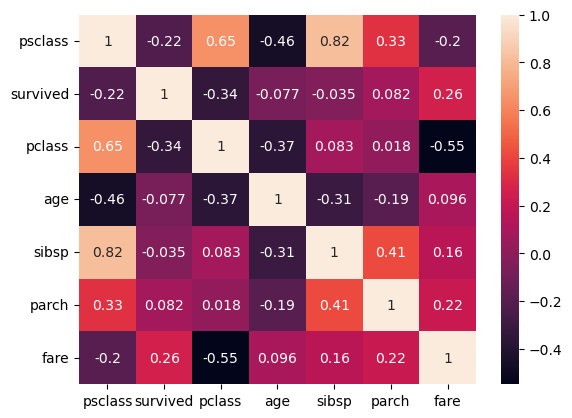

In [154]:
# heat map showing correlation

crr = titanic.corr(numeric_only= True)
sns.heatmap(crr, annot=True);

#### Aggrigate (agg):

> `agg() allows you to apply a descriptive statistical function or a list of descriptive statistical function (function names) to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis.`

In [156]:
# mean

titanic.mean(numeric_only= True)

psclass      2.831650
survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [161]:
# mean of all the columns by agg()

titanic[list(titanic.select_dtypes(exclude= 'O').columns)].agg('mean')

psclass      2.831650
survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [162]:
# mean and std of all the columns by agg()

titanic[list(titanic.select_dtypes(exclude= 'O').columns)].agg(['mean', 'std'])

,psclass,survived,pclass,age,sibsp,parch,fare
mean,2.831650,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,1.438143,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429


In [163]:
# mean, std, min, max, median by agg() of all the columns

titanic[list(titanic.select_dtypes(exclude= 'O').columns)].agg(['mean', 'std', 'min', 'max', 'median'])

,psclass,survived,pclass,age,sibsp,parch,fare
mean,2.831650,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,1.438143,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
max,11.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
median,3.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


In [165]:
# mean of survived column and min and max of age column by agg()

titanic.agg({'survived': 'mean', 'age': ['min', 'max']})

,survived,age
mean,0.383838,NaN
min,NaN,0.42
max,NaN,80.00


In [167]:
# max of all the columns by agg()

titanic[list(titanic.select_dtypes(exclude= 'O').columns)].agg(max)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\3052960547.py:3: FutureWarning: The provided callable <built-in function max> is currently using DataFrame.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic[list(titanic.select_dtypes(exclude= 'O').columns)].agg(max)


psclass      11.0000
survived      1.0000
pclass        3.0000
age          80.0000
sibsp         8.0000
parch         6.0000
fare        512.3292
dtype: float64

### apply() , map() and applymap()
`Important in machine learning`

In [175]:
help(titanic[list(titanic.select_dtypes(exclude= 'O').columns)].apply('min'))

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contain

In [176]:
# Create a dataframe

k = {'monday': [1,23,45,54], 'tuesday': [24,2,4,24], 'wednesday': [67,77,77,67], 'thursday': [1,2,3,4], 'friday': [5,10,1,1.5]}
k = pd.DataFrame(k, index= ['A','B','C','D'])
k

,monday,tuesday,wednesday,thursday,friday
A,1,24,67,1,5.0
B,23,2,77,2,10.0
C,45,4,77,3,1.0
D,54,24,67,4,1.5


In [177]:
# min of all the columns

k.min(axis= 0)

monday        1.0
tuesday       2.0
wednesday    67.0
thursday      1.0
friday        1.0
dtype: float64

In [178]:
# mix of all the rows

k.min(axis= 1)

A    1.0
B    2.0
C    1.0
D    1.5
dtype: float64

In [179]:
# max-min of all the columns

k.max(axis= 0)-k.min(axis= 0)

monday       53.0
tuesday      22.0
wednesday    10.0
thursday      3.0
friday        9.0
dtype: float64

#### apply():

> `apply() method allows you to apply a function along one of the axis of the DataFrame, default 0, which is the index (row) axis.`

In [180]:
# apply function of max-min on axis= 0

k.apply(lambda x: x.max()-x.min(),axis= 0)

monday       53.0
tuesday      22.0
wednesday    10.0
thursday      3.0
friday        9.0
dtype: float64

In [181]:
# create a function which will return difference of max-min

def diff_maxmin(n):
    diff = n.max(axis = 0)-n.min(axis= 0)
    return diff

diff_maxmin(k)

monday       53.0
tuesday      22.0
wednesday    10.0
thursday      3.0
friday        9.0
dtype: float64

In [182]:
# apply lambda by diff_maxmin() on the dataframe when axis= 0

k.apply(lambda x: diff_maxmin(x),axis= 0)

monday       53.0
tuesday      22.0
wednesday    10.0
thursday      3.0
friday        9.0
dtype: float64

In [183]:
# apply the diff_maxmin() on the dataframe when axis= 0

k.apply(diff_maxmin,axis= 0)

monday       53.0
tuesday      22.0
wednesday    10.0
thursday      3.0
friday        9.0
dtype: float64

In [184]:
# apply lambda by np.sum() on the dataframe when axis= 1

k.apply(lambda x: np.sum(x), axis= 1)

A     98.0
B    114.0
C    130.0
D    150.5
dtype: float64

In [185]:
# Data head()

summer.head(3)

,Athlete,Year,City,Sport,Discipline,Gender,Event,Medal
0,"HERSCHMANN, Otto",1896,Athens,Aquatics,Swimming,Men,100M Freestyle,Silver
1,"MALOKINIS, Ioannis",1896,Athens,Aquatics,Swimming,Men,100M Freestyle For Sailors,Gold
2,"ANDREOU, Joannis",1896,Athens,Aquatics,Swimming,Men,1200M Freestyle,Silver


In [186]:
# apply function which will give the first character of the column name athlete

summer['Athlete'].apply(lambda x: x[0])

0        H
1        M
2        A
3        p
4        N
        ..
31155    J
31156    R
31157    T
31158    A
31159    L
Name: Athlete, Length: 31160, dtype: object

In [187]:
# apply function which will give the first letter of the column name athlete

summer['Athlete'].apply(lambda x: x.split(',')[0])

0        HERSCHMANN
1         MALOKINIS
2           ANDREOU
3             palak
4           NEUMANN
            ...    
31155    JANIKOWSKI
31156        REZAEI
31157        TOTROV
31158    ALEKSANYAN
31159       LIDBERG
Name: Athlete, Length: 31160, dtype: object

#### map()

`It work on series only`

> `map() is used to map the data`

In [188]:
# retrive the first character of the column athlete by map()

summer['Athlete'].map(lambda x: x[0])

0        H
1        M
2        A
3        p
4        N
        ..
31155    J
31156    R
31157    T
31158    A
31159    L
Name: Athlete, Length: 31160, dtype: object

In [191]:
summer['Gender'].map({'Men': 1, 'Women': 2})

0        1.0
1        1.0
2        1.0
3        NaN
4        1.0
        ... 
31155    1.0
31156    1.0
31157    1.0
31158    1.0
31159    1.0
Name: Gender, Length: 31160, dtype: float64

In [192]:
summer['Gender'].map({'Men': 1, 'Women': 2}).map(lambda x: sum([x, x**2]))

0        2.0
1        2.0
2        2.0
3        NaN
4        2.0
        ... 
31155    2.0
31156    2.0
31157    2.0
31158    2.0
31159    2.0
Name: Gender, Length: 31160, dtype: float64

In [193]:
# 

summer['Gender'].map({'Men': 1, 'Women': 2}).map(lambda x: sum([x, x**2])).apply(lambda x: sum([x]))

0        2.0
1        2.0
2        2.0
3        NaN
4        2.0
        ... 
31155    2.0
31156    2.0
31157    2.0
31158    2.0
31159    2.0
Name: Gender, Length: 31160, dtype: float64

In [194]:
help(summer['Gender'].map({'Men': 1, 'Women': 2}))

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contain

In [195]:
help(map(lambda x: x,[1,3,2]))

Help on map object:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [196]:
# retrive the first letter of the column athlete by map()

summer['Athlete'].map(lambda x: x.split(',')[0])

0        HERSCHMANN
1         MALOKINIS
2           ANDREOU
3             palak
4           NEUMANN
            ...    
31155    JANIKOWSKI
31156        REZAEI
31157        TOTROV
31158    ALEKSANYAN
31159       LIDBERG
Name: Athlete, Length: 31160, dtype: object

In [197]:
help(summer.apply)

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), by_row: "Literal[False, 'compat']" = 'compat', **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply functi

In [198]:
help(summer['Athlete'].map)

Help on method map in module pandas.core.series:

map(arg: 'Callable | Mapping | Series', na_action: "Literal['ignore'] | None" = None) -> 'Series' method of pandas.core.series.Series instance
    Map values of Series according to an input mapping or function.
    
    Used for substituting each value in a Series with another value,
    that may be derived from a function, a ``dict`` or
    a :class:`Series`.
    
    Parameters
    ----------
    arg : function, collections.abc.Mapping subclass or Series
        Mapping correspondence.
    na_action : {None, 'ignore'}, default None
        If 'ignore', propagate NaN values, without passing them to the
        mapping correspondence.
    
    Returns
    -------
    Series
        Same index as caller.
    
    See Also
    --------
    Series.apply : For applying more complex functions on a Series.
    Series.replace: Replace values given in `to_replace` with `value`.
    DataFrame.apply : Apply a function row-/column-wise.
    DataFr

In [199]:
help(summer.applymap)

Help on method applymap in module pandas.core.frame:

applymap(func: 'PythonFuncType', na_action: 'NaAction | None' = None, **kwargs) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Apply a function to a Dataframe elementwise.
    
    .. deprecated:: 2.1.0
    
       DataFrame.applymap has been deprecated. Use DataFrame.map instead.
    
    This method applies a function that accepts and returns a scalar
    to every element of a DataFrame.
    
    Parameters
    ----------
    func : callable
        Python function, returns a single value from a single value.
    na_action : {None, 'ignore'}, default None
        If 'ignore', propagate NaN values, without passing them to func.
    **kwargs
        Additional keyword arguments to pass as keywords arguments to
        `func`.
    
    Returns
    -------
    DataFrame
        Transformed DataFrame.
    
    See Also
    --------
    DataFrame.apply : Apply a function along input axis of DataFrame.
    DataFrame.ma

In [200]:
# error due to - bcz it works on series only

summer.map(lambda x: x.split(',')[0])

AttributeError: 'int' object has no attribute 'split'

#### applymap()

> `It is used to do operations on columns of the dataframe` <br>
> `mostly used to do transformation(mathmetical operations) on dataframe`

In [201]:
# multiply all the values with 0.6

k.applymap(lambda x: x*0.6)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\727910597.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  k.applymap(lambda x: x*0.6)


,monday,tuesday,wednesday,thursday,friday
A,0.6,14.4,40.2,0.6,3.0
B,13.8,1.2,46.2,1.2,6.0
C,27.0,2.4,46.2,1.8,0.6
D,32.4,14.4,40.2,2.4,0.9


In [202]:
# multiply all the int values by 'palak'

k.applymap(lambda x: int(x)*'palak')

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\1531006521.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  k.applymap(lambda x: int(x)*'palak')


,monday,tuesday,wednesday,thursday,friday
A,palak,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palak,palakpalakpalakpalakpalak
B,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalak,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalak,palakpalakpalakpalakpalakpalakpalakpalakpalakp...
C,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalakpalak,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalak,palak
D,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalakpalakpalakpalakpalakpalakpalakp...,palakpalakpalakpalak,palak


In [203]:
# error due to applying it on the series

k['tuesday'].applymap(lambda x: x*0.6)

AttributeError: 'Series' object has no attribute 'applymap'

In [204]:
# error due to applying it on the series

k[['tuesday']].applymap(lambda x: x*0.6)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\971795542.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  k[['tuesday']].applymap(lambda x: x*0.6)


,tuesday
A,14.4
B,1.2
C,2.4
D,14.4


#### Exercise on apply(), map(), and applymap()

In [205]:
# Create a dataframe


df = pd.DataFrame([(1,521,True,10.1,'Hello'),
                   (2,321,False,54.2,'Hey'),
                   (3,551,False,33.2,'Howdy'),\
                   (4,np.NaN,True,48.6,'Hi'),
                   (5,511,False,98.1,'Hey')], columns= ['colA', 'colB', 'colC', 'colD', 'colE'])

df

,colA,colB,colC,colD,colE
0,1,521.0,True,10.1,Hello
1,2,321.0,False,54.2,Hey
2,3,551.0,False,33.2,Howdy
3,4,NaN,True,48.6,Hi
4,5,511.0,False,98.1,Hey


In [207]:
# assign colA and colB the square root of there values

df[['colA','colB']]= df[['colA','colB']].apply(np.sqrt)

round(df,2)

,colA,colB,colC,colD,colE
0,1.00,4.78,True,10.1,Hello
1,1.19,4.23,False,54.2,Hey
2,1.32,4.84,False,33.2,Howdy
3,1.41,NaN,True,48.6,Hi
4,1.50,4.75,False,98.1,Hey


In [208]:
# change values of colE to good bye if it is hello or bye if hey

df['colE']= df['colE'].map({'Hello': 'Good Bye', 'Hey': 'Bye'})

round(df,2)

,colA,colB,colC,colD,colE
0,1.00,4.78,True,10.1,Good Bye
1,1.19,4.23,False,54.2,Bye
2,1.32,4.84,False,33.2,NaN
3,1.41,NaN,True,48.6,NaN
4,1.50,4.75,False,98.1,Bye


In [209]:
# error due to series, apply and applymap works on dataframe

df['colE']= df['colE'].apply({'Hello': 'Good Bye', 'Hey': 'Bye'})

round(df,2)

AttributeError: 'Good Bye' is not a valid function for 'Series' object

In [210]:
# assign colA and colD x**2 of there values

df[['colB']]= df[['colB']].applymap(lambda x: x**2, na_action = 'ignore')

round(df,2)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_15752\4055199813.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['colB']]= df[['colB']].applymap(lambda x: x**2, na_action = 'ignore')


,colA,colB,colC,colD,colE
0,1.00,22.83,True,10.1,Good Bye
1,1.19,17.92,False,54.2,Bye
2,1.32,23.47,False,33.2,NaN
3,1.41,NaN,True,48.6,NaN
4,1.50,22.61,False,98.1,Bye


In [211]:
# assign colA and colD x**2 of there values

df[['colB']]= df[['colB']].apply(lambda x: x**2)

round(df,2)

,colA,colB,colC,colD,colE
0,1.00,521.0,True,10.1,Good Bye
1,1.19,321.0,False,54.2,Bye
2,1.32,551.0,False,33.2,NaN
3,1.41,NaN,True,48.6,NaN
4,1.50,511.0,False,98.1,Bye


In [212]:
# error due to dataframe, it works on series only

df[['colA','colD']]= df[['colA','colD']].map(lambda x: x+2)

round(df,2)

,colA,colB,colC,colD,colE
0,3.00,521.0,True,12.1,Good Bye
1,3.19,321.0,False,56.2,Bye
2,3.32,551.0,False,35.2,NaN
3,3.41,NaN,True,50.6,NaN
4,3.50,511.0,False,100.1,Bye


In [213]:
# square all the values of the series by map()

df['colD']= df['colD'].map(lambda x: x**2)

round(df,2)

,colA,colB,colC,colD,colE
0,3.00,521.0,True,146.41,Good Bye
1,3.19,321.0,False,3158.44,Bye
2,3.32,551.0,False,1239.04,NaN
3,3.41,NaN,True,2560.36,NaN
4,3.50,511.0,False,10020.01,Bye


### assign() and query()

In [214]:
df_temp = pd.read_clipboard()

In [216]:
df_temp

,,colA,colB,colC,colD,colE
0,3.00,521.0,True,12.1,Good,Bye
1,3.19,321.0,False,56.2,Bye,None
2,3.32,551.0,False,35.2,NaN,None
3,3.41,NaN,True,50.6,NaN,None
4,3.50,511.0,False,100.1,Bye,None


In [217]:
df_temp.assign(colA = df_temp['colA']+100)

,,colA,colB,colC,colD,colE
0,3.00,621.0,True,12.1,Good,Bye
1,3.19,421.0,False,56.2,Bye,None
2,3.32,651.0,False,35.2,NaN,None
3,3.41,NaN,True,50.6,NaN,None
4,3.50,611.0,False,100.1,Bye,None


In [218]:
# create new column with values of colD+5

df_new = df.assign(count_plus_5 = df['colD']+5)
df_new.head()

,colA,colB,colC,colD,colE,count_plus_5
0,3.000000,521.0,True,146.41,Good Bye,151.41
1,3.189207,321.0,False,3158.44,Bye,3163.44
2,3.316074,551.0,False,1239.04,NaN,1244.04
3,3.414214,NaN,True,2560.36,NaN,2565.36
4,3.495349,511.0,False,10020.01,Bye,10025.01


In [219]:
# Filter data where values of column D 

df_query = df.query("colD < 2000")
df_query.head()

,colA,colB,colC,colD,colE
0,3.000000,521.0,True,146.41,Good Bye
2,3.316074,551.0,False,1239.04,NaN


In [220]:
# Filter data where values of column E is equal to 'Bye'

df_query = df.query("colE == 'Bye'")
df_query.head()

,colA,colB,colC,colD,colE
1,3.189207,321.0,False,3158.44,Bye
4,3.495349,511.0,False,10020.01,Bye


In [221]:
# Filter data where values of column E is equal to 'Bye'

df[df['colE'] == 'Bye']

,colA,colB,colC,colD,colE
1,3.189207,321.0,False,3158.44,Bye
4,3.495349,511.0,False,10020.01,Bye


In [222]:
# create dataframe

df1 = pd.DataFrame({'A': range(1, 6),'B': range(10, 0, -2),'C C': range(10, 5, -1)})
df1

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [223]:
# Filter data where values of column B is equal to column C C
# backtick are used when the column name have spaces in between there names

df1.query("B == `C C`")

,A,B,C C
0,1,10,10


In [224]:
# filter data where the value of column B is equal to column A

df1.query("B == A")

,A,B,C C
3,4,4,7


In [225]:
# filter data where the value of column B is equal to column A

df1[df1['B'] == df1['A']]

,A,B,C C
3,4,4,7
